# 混合型基金数据分析
## 项目背景
随着人均收入水平和家庭财富的逐步增长，人们对于理财的需求日趋旺盛，而受2020年新冠肺炎疫情影响，居民的投资理财意识被进一步激发。作为优质标的，操作难度适中的公募基金投资方式受到了广大居民的追捧，而作为占据整个公募基金利润总额半壁江山的混合型公募基金，其投资动态和持仓变化较大程度地决定了国家金融市场的稳定发展以及个人家庭理财的收益，所以对于混合型公募基金的数据分析就变得尤为重要。
## 项目简介
本项目使用Python采集和分析了[天天基金网](https://fund.eastmoney.com/)于2020年11月24日更新的混合型公募基金数据，由于电脑内存和时间限制，项目只截取了近2年累计收益率在前100的混合型基金数据作为项目分析数据集。通过分析基金收益现状和持仓变化的趋势，做出基于分析的投资建议和策略。
## 分析步骤
- 提出问题
- 数据采集
- 数据评估与清洗
- 探索性分析
    - 基金部分
    - 股票部分
- 结论和建议

## 提出问题
本项目将需要探索的问题归纳为两个部分：基金部分和股票持仓部分，然后对每一个部分再进行细分拆解：
- 基金部分
    - 哪些基金的长期收益较高？哪些基金不管是从长期还是短期来看，其收益都能保持着较为稳定的增长？
    - 长期收益较高的基金（如近3年、近2年累计收益率较高的基金）近期收益如何？
    - 基金市场收益是否存在周期性？
    - 有哪些基金投资的建议？
- 股票部分
    - 近期基金对于个股的持仓变化，比如青睐哪些个股？
    - 能否从基金持仓数据中展现产业发展趋势？
    - 有哪些投资股票的建议？

## 评估指标
本项目在对基金数据评估和股票数据评估采用不同的评估指标：
- 基金数据主要根据其不同时段的累计收益率进行评估
- 股票数据因为涉及到两个关键变量，持仓基金机构数和持仓平均比重，由于两者的单位标准不同，所以将两个评估指标归一化之后在计算其调和平均数，从而作为综合评估基金机构对于股票的整体持仓态度

# 导入库

In [601]:
import requests
from bs4 import BeautifulSoup
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from datetime import datetime
import time
import json
import loadlinkhtml
import getfundinfo
import getfundshareholds
import re
pd.set_option('max_colwidth',300)
header = {'User-Agent': 'Mozilla/5.0 (Windows NT 6.1) AppleWebKit/537.36 (KHTML, like Gecko) Chrome/86.0.4240.183 Safari/537.36'}

In [2]:
import warnings
warnings.filterwarnings("ignore")
plt.rcParams['font.family']=['Microsoft YaHei'] #用来正常显示中文标签
plt.rcParams['axes.unicode_minus']=False #用来正常显示负号

In [390]:
from plotSlope import slope #导入BumpChart第三方库

# 数据导入和理解

本项目编写了实现数据采集的脚本：
- `getfundinfo.py`：实现基金数据的采集
- `getfundshareholds.py`：实现每一只基金对应十大重仓数据的采集  

通过`基金数据提取_20201124.ipynb`文档运行脚本，执行采集操作，并将采集下来的数据集存储至本地，分别命名为`fundInfo_20201124.csv`和`top100fund_shs_2020-09-30`


## 基金数据
主要包含的变量如下：
- 基金代码：基金的唯一识别码，通过输入该码可以搜索到对应基金
- 基金名称：基金所属名称
- 累计收益率数据：包含日增长率、近1周、近3月、近6月、近1年、近2年、近3年、今年来、成立来
- 基金链接：通过进入该链接可以查看更多的基金信息

In [675]:
f_df = pd.read_csv('fundInfo_2020-11-24.csv',encoding='gbk')
f_df.head(2)

,基金代码,基金名称,单位净值|日期,日增长率,近1周,近1月,近3月,近6月,近1年,近2年,近3年,今年来,成立来,手续费|起购金额,操作,基金链接
0,161903,万家行业优选混合(LOF),2.105611-24,-0.01%,1.01%,9.01%,11.49%,37.70%,102.12%,246.29%,203.74%,87.61%,942.67%,0.15%1.50%100元,买入定投,http://fund.eastmoney.com/161903.html
1,100060,富国高新技术产业混合,4.409011-24,-0.23%,1.17%,10.11%,14.40%,72.16%,111.67%,233.08%,155.09%,87.54%,515.00%,0.15%1.50%100元,买入定投,http://fund.eastmoney.com/100060.html


## 基金十大重仓股票数据
提取`f_df`中每一只基金对应年份对应季度的股票重仓数据，主要包含的数据变量如下：

- 基金代码：基金的唯一识别码，通过输入该码可以搜索到对应基金
- 股票代码：股票的唯一识别码，通过输入该码可以搜索到对应股票
- 股票名称：股票所属名称
- 持仓占比：基金持有对应股票的净值占总持有持有净值的百分比
- 持仓截止日期：持仓信息更新的日期


In [605]:
allfund_shs_df = pd.read_csv('top100fund_shs_2020-09-30.csv',end_timeoding='gbk')

In [674]:
allfund_shs_df.head()

,基金代码,重仓股票代码,股票名称,持仓占比,持仓截止日期
0,161903,2594,比亚迪,9.26%,2020-09-30
1,161903,603986,兆易创新,8.75%,2020-09-30
2,161903,600588,用友网络,8.70%,2020-09-30
3,161903,300454,深信服,8.50%,2020-09-30
4,161903,300676,华大基因,6.33%,2020-09-30


# 数据评估与清洗

合并基金主页信息和基金持仓信息，并对合并后的数据进行一致性和有效性处理

## 合并

In [606]:
# 将f_df与allfund_shareholds_df按照对应的基金代码合并成一个DataFrame
f_s_df = pd.merge(f_df,allfund_shs_df,on='基金代码',how='left')

In [607]:
f_s_df.head(2)

,基金代码,基金名称,单位净值|日期,日增长率,近1周,近1月,近3月,近6月,近1年,近2年,近3年,今年来,成立来,手续费|起购金额,操作,基金链接,重仓股票代码,股票名称,持仓占比,持仓截止日期
0,161903,万家行业优选混合(LOF),2.105611-24,-0.01%,1.01%,9.01%,11.49%,37.70%,102.12%,246.29%,203.74%,87.61%,942.67%,0.15%1.50%100元,买入定投,http://fund.eastmoney.com/161903.html,2594,比亚迪,9.26%,2020-09-30
1,161903,万家行业优选混合(LOF),2.105611-24,-0.01%,1.01%,9.01%,11.49%,37.70%,102.12%,246.29%,203.74%,87.61%,942.67%,0.15%1.50%100元,买入定投,http://fund.eastmoney.com/161903.html,603986,兆易创新,8.75%,2020-09-30


## 检查和评估数据
对合并后的数据进行评估，如检查是否存在不必要的数据、数据类型有误、异常值、重复值、缺失值等情况

### 数据属性评估

In [608]:
# 评估合并后数据的基本信息
f_s_df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 3000 entries, 0 to 2999
Data columns (total 20 columns):
基金代码        3000 non-null int64
基金名称        3000 non-null object
单位净值|日期     3000 non-null object
日增长率        3000 non-null object
近1周         3000 non-null object
近1月         3000 non-null object
近3月         3000 non-null object
近6月         3000 non-null object
近1年         3000 non-null object
近2年         3000 non-null object
近3年         3000 non-null object
今年来         3000 non-null object
成立来         3000 non-null object
手续费|起购金额    3000 non-null object
操作          3000 non-null object
基金链接        3000 non-null object
重仓股票代码      3000 non-null int64
股票名称        3000 non-null object
持仓占比        3000 non-null object
持仓截止日期      3000 non-null object
dtypes: int64(2), object(18)
memory usage: 281.2+ KB


- `单位净值`、`手续费|起购金额`、`操作`数据对项目分析没有实际作用，可删除；
- 源表中表示收益率的百分比数据的数据类型均为object，应改成float；
- `持仓截止日期`的数据类型需改成datetime；

### 数据异常评估
清洗完对数据属性评估的数据问题之后，再来对异常数值进行评估

In [622]:
# 是否存在缺失值
f_s_df.isnull().sum()

基金代码      0
基金名称      0
日增长率      0
近1周       0
近1月       0
近3月       0
近6月       0
近1年       0
近2年       0
近3年       0
今年来       0
成立来       0
基金链接      0
重仓股票代码    0
股票名称      0
持仓占比      0
持仓截止日期    0
日期        0
dtype: int64

In [623]:
# 是否存在重复记录
f_s_df.duplicated().sum()

0

In [624]:
# 是否存在异常值
f_s_df.describe()

,基金代码,日增长率,近1周,近1月,近3月,近6月,近1年,近2年,近3年,今年来,成立来,重仓股票代码,持仓占比
count,3000.000000,3000.000000,3000.000000,3000.000000,3000.000000,3000.000000,3000.000000,3000.000000,3000.000000,3000.000000,3000.000000,3000.000000,3000.000000
mean,121534.750000,-0.001633,0.014698,0.078578,0.072472,0.491007,0.845610,1.893944,1.085396,0.722598,3.167774,299682.118667,0.053696
std,194541.863877,0.006936,0.015178,0.040763,0.080458,0.152934,0.179460,0.164402,0.541003,0.146887,3.528574,267074.590483,0.019715
min,167.000000,-0.015700,-0.026600,-0.052300,-0.150700,0.085700,0.544100,1.699600,0.000000,0.426900,0.586000,1.000000,0.016300
25%,1850.000000,-0.006300,0.004525,0.056250,0.012750,0.408850,0.737925,1.766100,0.967025,0.631600,1.525000,2384.000000,0.038100
50%,5341.500000,-0.003050,0.014100,0.074750,0.071700,0.479450,0.802300,1.852150,1.195800,0.692900,1.875450,300463.000000,0.049750
75%,162881.000000,0.001700,0.024225,0.107875,0.131325,0.567650,0.948400,1.964275,1.445800,0.799975,2.947575,600588.000000,0.067800
max,690005.000000,0.027300,0.048800,0.188900,0.249600,0.961000,1.512200,2.462900,2.209600,1.197600,21.958800,688981.000000,0.107000


In [625]:
f_s_df[f_s_df['成立来'] == f_s_df['成立来'].max()]

,基金代码,基金名称,日增长率,近1周,近1月,近3月,近6月,近1年,近2年,近3年,今年来,成立来,基金链接,重仓股票代码,股票名称,持仓占比,持仓截止日期,日期
1290,260104,景顺长城内需增长混合,-0.006,0.0042,0.0694,0.096,0.5427,0.696,1.8759,1.2167,0.629,21.9588,http://fund.eastmoney.com/260104.html,568,泸州老窖,0.0905,2020-09-30,2020-11-24
1291,260104,景顺长城内需增长混合,-0.006,0.0042,0.0694,0.096,0.5427,0.696,1.8759,1.2167,0.629,21.9588,http://fund.eastmoney.com/260104.html,601888,中国中免,0.0881,2020-09-30,2020-11-24
1292,260104,景顺长城内需增长混合,-0.006,0.0042,0.0694,0.096,0.5427,0.696,1.8759,1.2167,0.629,21.9588,http://fund.eastmoney.com/260104.html,858,五粮液,0.0855,2020-09-30,2020-11-24
1293,260104,景顺长城内需增长混合,-0.006,0.0042,0.0694,0.096,0.5427,0.696,1.8759,1.2167,0.629,21.9588,http://fund.eastmoney.com/260104.html,600519,贵州茅台,0.0794,2020-09-30,2020-11-24
1294,260104,景顺长城内需增长混合,-0.006,0.0042,0.0694,0.096,0.5427,0.696,1.8759,1.2167,0.629,21.9588,http://fund.eastmoney.com/260104.html,2311,海大集团,0.0644,2020-09-30,2020-11-24
1295,260104,景顺长城内需增长混合,-0.006,0.0042,0.0694,0.096,0.5427,0.696,1.8759,1.2167,0.629,21.9588,http://fund.eastmoney.com/260104.html,300760,迈瑞医疗,0.0601,2020-09-30,2020-11-24
1296,260104,景顺长城内需增长混合,-0.006,0.0042,0.0694,0.096,0.5427,0.696,1.8759,1.2167,0.629,21.9588,http://fund.eastmoney.com/260104.html,2415,海康威视,0.0582,2020-09-30,2020-11-24
1297,260104,景顺长城内需增长混合,-0.006,0.0042,0.0694,0.096,0.5427,0.696,1.8759,1.2167,0.629,21.9588,http://fund.eastmoney.com/260104.html,600276,恒瑞医药,0.0531,2020-09-30,2020-11-24
1298,260104,景顺长城内需增长混合,-0.006,0.0042,0.0694,0.096,0.5427,0.696,1.8759,1.2167,0.629,21.9588,http://fund.eastmoney.com/260104.html,603899,晨光文具,0.0514,2020-09-30,2020-11-24
1299,260104,景顺长城内需增长混合,-0.006,0.0042,0.0694,0.096,0.5427,0.696,1.8759,1.2167,0.629,21.9588,http://fund.eastmoney.com/260104.html,603288,海天味业,0.0481,2020-09-30,2020-11-24


## 清洗数据
根据上述评估结果，对数据进行清洗

### 删除列&拆分列

In [613]:
# 删除不必要的列
f_s_df.drop(labels=['手续费|起购金额','操作'],axis=1, inplace=True)

In [614]:
# 从"单位净值|日期"取出"日期"列
f_s_df['日期'] = f_s_df['单位净值|日期'].apply(lambda x:x[-5:])

# 将日期更改为包含年月日的日期类型
f_s_df['日期'] = f_s_df['日期'].apply(lambda x:pd.to_datetime('%s'%(datetime.now().year) + '-'+ x),'D')

# 删除“单位净值|日期”列
f_s_df.drop(labels=['单位净值|日期'],axis=1,inplace=True)

In [615]:
f_s_df.head(2)

,基金代码,基金名称,日增长率,近1周,近1月,近3月,近6月,近1年,近2年,近3年,今年来,成立来,基金链接,重仓股票代码,股票名称,持仓占比,持仓截止日期,日期
0,161903,万家行业优选混合(LOF),-0.01%,1.01%,9.01%,11.49%,37.70%,102.12%,246.29%,203.74%,87.61%,942.67%,http://fund.eastmoney.com/161903.html,2594,比亚迪,9.26%,2020-09-30,2020-11-24
1,161903,万家行业优选混合(LOF),-0.01%,1.01%,9.01%,11.49%,37.70%,102.12%,246.29%,203.74%,87.61%,942.67%,http://fund.eastmoney.com/161903.html,603986,兆易创新,8.75%,2020-09-30,2020-11-24


### 更改数据类型

In [616]:
# 自定义函数，将百分比字符串更改为浮点型数值
def string_to_number(string):
    '''
    Parameters:
    string  - (string) The data that's need to change to float.a
    
    Returns:
    update_value - (float) Updated float number
    '''
    try:
        update_value = round(float(string),4)
    except:
        if (string[-1] == "%"):
            update_value = round(float(string.strip('%'))/100,4)
        else:
            update_value = round(0,4)
    finally:
        return update_value
    

In [617]:
# 将需要更改的列的每一个数值应用到自定义函数上
f_s_df.iloc[:,2:12] = f_s_df.iloc[:,2:12].applymap(lambda x:string_to_number(x))

In [618]:
f_s_df['持仓占比'] = f_s_df['持仓占比'].apply(lambda x:string_to_number(x))

In [619]:
# 将持仓截止日期更改为日期型
f_s_df['持仓截止日期'] = pd.to_datetime(f_s_df['持仓截止日期'])

In [620]:
# 检查清洗后的结果和数据类型
f_s_df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 3000 entries, 0 to 2999
Data columns (total 18 columns):
基金代码      3000 non-null int64
基金名称      3000 non-null object
日增长率      3000 non-null float64
近1周       3000 non-null float64
近1月       3000 non-null float64
近3月       3000 non-null float64
近6月       3000 non-null float64
近1年       3000 non-null float64
近2年       3000 non-null float64
近3年       3000 non-null float64
今年来       3000 non-null float64
成立来       3000 non-null float64
基金链接      3000 non-null object
重仓股票代码    3000 non-null int64
股票名称      3000 non-null object
持仓占比      3000 non-null float64
持仓截止日期    3000 non-null datetime64[ns]
日期        3000 non-null datetime64[ns]
dtypes: datetime64[ns](2), float64(11), int64(2), object(3)
memory usage: 410.2+ KB


In [621]:
f_s_df.head(2)

,基金代码,基金名称,日增长率,近1周,近1月,近3月,近6月,近1年,近2年,近3年,今年来,成立来,基金链接,重仓股票代码,股票名称,持仓占比,持仓截止日期,日期
0,161903,万家行业优选混合(LOF),-0.0001,0.0101,0.0901,0.1149,0.377,1.0212,2.4629,2.0374,0.8761,9.4267,http://fund.eastmoney.com/161903.html,2594,比亚迪,0.0926,2020-09-30,2020-11-24
1,161903,万家行业优选混合(LOF),-0.0001,0.0101,0.0901,0.1149,0.377,1.0212,2.4629,2.0374,0.8761,9.4267,http://fund.eastmoney.com/161903.html,603986,兆易创新,0.0875,2020-09-30,2020-11-24


# 探索性分析
- 基金部分
    - 哪些基金的长期收益较高？哪些基金不管是从长期还是短期来看，其收益都能保持着较为稳定的增长？
    - 长期收益较高的基金（如近3年、近2年累计收益率较高的基金）是否存在近期收益下降的趋势？
    - 基金市场收益是否存在较强的周期性？
- 股票部分
    - 近期基金对于个股的持仓变化，比如青睐哪些个股？
    - 能否从基金持仓数据中展现产业发展趋势？

## 基金部分

In [626]:
# 选择供基金分析的数据集
fund_rank_df = f_s_df.iloc[:,:12]

In [627]:
fund_rank_df.drop_duplicates(inplace=True)

In [628]:
# 得到唯一的100只基金数据
fund_rank_df.shape

(100, 12)

In [629]:
fund_rank_df.head()

,基金代码,基金名称,日增长率,近1周,近1月,近3月,近6月,近1年,近2年,近3年,今年来,成立来
0,161903,万家行业优选混合(LOF),-0.0001,0.0101,0.0901,0.1149,0.3770,1.0212,2.4629,2.0374,0.8761,9.4267
30,100060,富国高新技术产业混合,-0.0023,0.0117,0.1011,0.1440,0.7216,1.1167,2.3308,1.5509,0.8754,5.1500
60,5911,广发双擎升级混合A,-0.0036,0.0061,0.0581,-0.0180,0.2406,0.7098,2.2988,0.0000,0.5136,2.2981
90,1679,前海开源中国稀缺资产混合A,0.0069,0.0215,0.0655,0.0422,0.4934,0.9208,2.2562,2.1733,0.8295,1.6180
120,2079,前海开源中国稀缺资产混合C,0.0070,0.0216,0.0653,0.0418,0.4929,0.9195,2.2515,2.2096,0.8286,1.7410


### 基金收益排名
数据集选择按照近2年的收益率作为数据获取依据，是因为近2年的收益率既能代表基金收益的稳定性，也能代表未来收益的可持续性，即代表基金对于其投资企业的稳定性长期价值和未来成长性价值的评估

In [630]:
#获取近2年收益率在Top20的基金
recent_2y_fr = fund_rank_df.sort_values('近2年',ascending=False).head(20)
recent_3y_fr = fund_rank_df.sort_values('近3年',ascending=False).head(20)

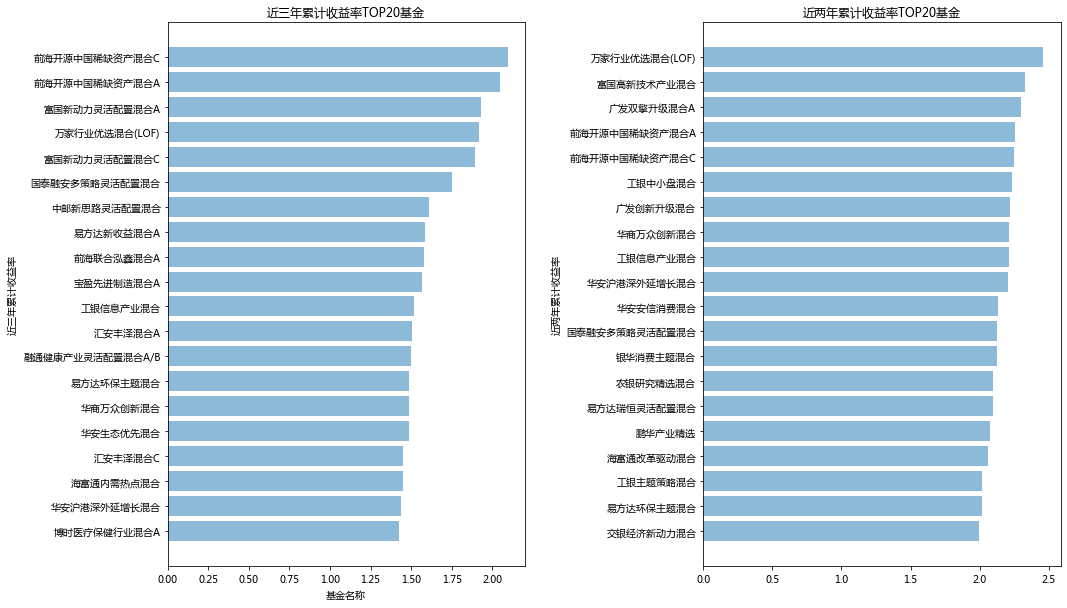

In [685]:
fig,axes = plt.subplots(1,2,figsize=(16,10),sharex=False,sharey=False)
axes[1].barh(recent_2y_fr['基金名称'],recent_2y_fr['近2年'],alpha=0.5)
axes[1].set(ylabel='近两年累计收益率',
       title='近两年累计收益率TOP20基金')
axes[0].barh(recent_3y_fr['基金名称'],recent_3y_fr['近3年'],alpha=0.5)
axes[0].set(xlabel='基金名称',
       ylabel='近三年累计收益率',
       title='近三年累计收益率TOP20基金')
fig.subplots_adjust(wspace=0.5,hspace=1.5)
axes[0].invert_yaxis()
axes[1].invert_yaxis();

近3年和近2年累计收益率均较高的有：万家行业优选混合(LOF)、富国高新技术产业混合、工银信息混合、华商万众创新混合

### 近两年累计收益率Top20基金在不同时间段的收益变化

In [647]:
# 分别根据'近3年','近2年','近1年','近6月'的收益率对基金进行排名
fund_rank_df2 = fund_rank_df[['基金名称','近3年','近2年','近1年','近6月']]
fund_rank_df2[['近3年','近2年','近1年','近6月']] = fund_rank_df2[['近3年','近2年','近1年','近6月']].apply(lambda x:x.rank(ascending=False))

In [648]:
# 选取近两年收益率在Top20的基金收益率的变化
visual_fund20_rank = fund_rank_df2.head(20).set_index('基金名称')

In [649]:
visual_fund20_rank.stack().reset_index(name='排名').rename(columns={'level_1':'收益率名称'}).to_csv('visual_fund20_rank.csv',index=False)

将以上导出的`visual_fund20_rank.csv`作为数据集，使用Tableau可视化出近两年累计收益率在TOP20的基金在不同时间段的收益变化趋势，可视化结果已分享到Tableau Public平台，点击下方链接即可查看:  
[2020年第三季度基金收益变化趋势](https://public.tableau.com/profile/novel6911#!/vizhome/2020_16062353357780/2020?publish=yes)

有可视化结果可知：
- 大部分长期收益率较高的基金，近期收益明显放缓或者下跌趋势，如：万家行业优选混合(LOF)、国泰融安多策略灵活配置混合、广发双擎升级混合、广发创新升级混合、前海开源中国稀缺资产混合C、前海开源中国稀缺资产混合A
- 部分基金长期收益一般，但是中短期收益爆发，如：工银主题策略混合、农银研究精选混合、易方达环保主题混合、易方达瑞恒灵活配置混合
- 部分基金整体都较为稳定，不管是从长期来看还是短期来看，收益均在稳步增长，如：工银信息产业混合、富国高新技术产业混合、工银中小盘混合

**综上所述，可以看出基金收益具有明显的周期性，基金对标的是股票市场，所以股票市场的投资很多时候是产业轮动的，基金对于各种主题的投资如果偏科严重可能会导致收益波动较大，如需追求长期收益稳定的基金，应该选择较为混合的基金进行配置。而对于短期涨幅较大的基金或产业，应该谨慎投资，因为此时市场是风险大于机会了。**

### 基金收益占比对比

In [652]:
# 自定义堆积柱形图
def stack_barh(results, category_names,figsize):
    """
    Parameters
    ----------
    results : dict
        A mapping from question labels to a list of answers per category.
        It is assumed all lists contain the same number of entries and that
        it matches the length of *category_names*.
    category_names : list of str
        The category labels.
    figsize: tuple of width and height
    """
    labels = list(results.keys())
    data = np.array(list(results.values()))
    data_cum = data.cumsum(axis=1)
    category_colors = plt.get_cmap('RdYlGn')(
        np.linspace(0.15, 0.85, data.shape[1]))

    fig, ax = plt.subplots(figsize=figsize)
    ax.invert_yaxis()
    ax.xaxis.set_visible(False)
    ax.set_xlim(0, np.sum(data, axis=1).max())

    for i, (colname, color) in enumerate(zip(category_names, category_colors)):
        widths = data[:, i]
        starts = data_cum[:, i] - widths
        ax.barh(labels, widths, left=starts, height=0.5,
                label=colname, color=color)
        xcenters = starts + widths / 2

        r, g, b, _ = color
        text_color = 'white' if r * g * b < 0.5 else 'darkgrey'
        for y, (x, c) in enumerate(zip(xcenters, widths)):
            ax.text(x, y, str(int(c)), ha='center', va='center',
                    color=text_color)
    ax.legend(ncol=len(category_names), bbox_to_anchor=(0, 1),
              loc='lower left', fontsize='small')

    return fig, ax

In [653]:
fund_incre_rank= fund_rank_df[['基金名称','近3年','近2年','近1年','近6月']]
fund_incre_data = fund_incre_rank.set_index('基金名称')
no_3year_fund_names = fund_incre_rank[fund_incre_rank['近3年']== 0]['基金名称'].values
incre_diffs = fund_incre_data - fund_incre_data.shift(periods = -1,axis=1,fill_value=0)
for fund_name in no_3year_fund_names:
    incre_diffs.loc[fund_name,'近3年'] = 0
incre_diffs_dict = dict()
for index,values in zip(fund_incre_data.index,incre_diffs.values):
    incre_diffs_dict[index] = values
incre_diffs_dict

{'万家行业优选混合(LOF)': array([-0.4255,  1.4417,  0.6442,  0.377 ]),
 '富国高新技术产业混合': array([-0.7799,  1.2141,  0.3951,  0.7216]),
 '广发双擎升级混合A': array([0.    , 1.589 , 0.4692, 0.2406]),
 '前海开源中国稀缺资产混合A': array([-0.0829,  1.3354,  0.4274,  0.4934]),
 '前海开源中国稀缺资产混合C': array([-0.0419,  1.332 ,  0.4266,  0.4929]),
 '工银中小盘混合': array([-0.7728,  0.966 ,  0.559 ,  0.7127]),
 '广发创新升级混合': array([-0.9381,  1.4175,  0.5321,  0.2703]),
 '华商万众创新混合': array([-0.6045,  1.1024,  0.5857,  0.5279]),
 '工银信息产业混合': array([-0.5703,  1.1114,  0.3391,  0.7651]),
 '华安沪港深外延增长混合': array([-0.6433,  1.2589,  0.3256,  0.6212]),
 '华安安信消费混合': array([-0.6669,  1.1928,  0.4709,  0.4664]),
 '国泰融安多策略灵活配置混合': array([-0.2644,  1.3489,  0.3734,  0.4066]),
 '银华消费主题混合': array([-1.2024,  1.3391,  0.2002,  0.5892]),
 '农银研究精选混合': array([-1.0161,  0.7131,  0.5661,  0.8158]),
 '易方达瑞恒灵活配置混合': array([0.    , 1.2789, 0.1938, 0.6218]),
 '鹏华产业精选': array([0.    , 1.33  , 0.285 , 0.4594]),
 '海富通改革驱动混合': array([-0.7017,  0.9834,  0.5121,  0.5671]),

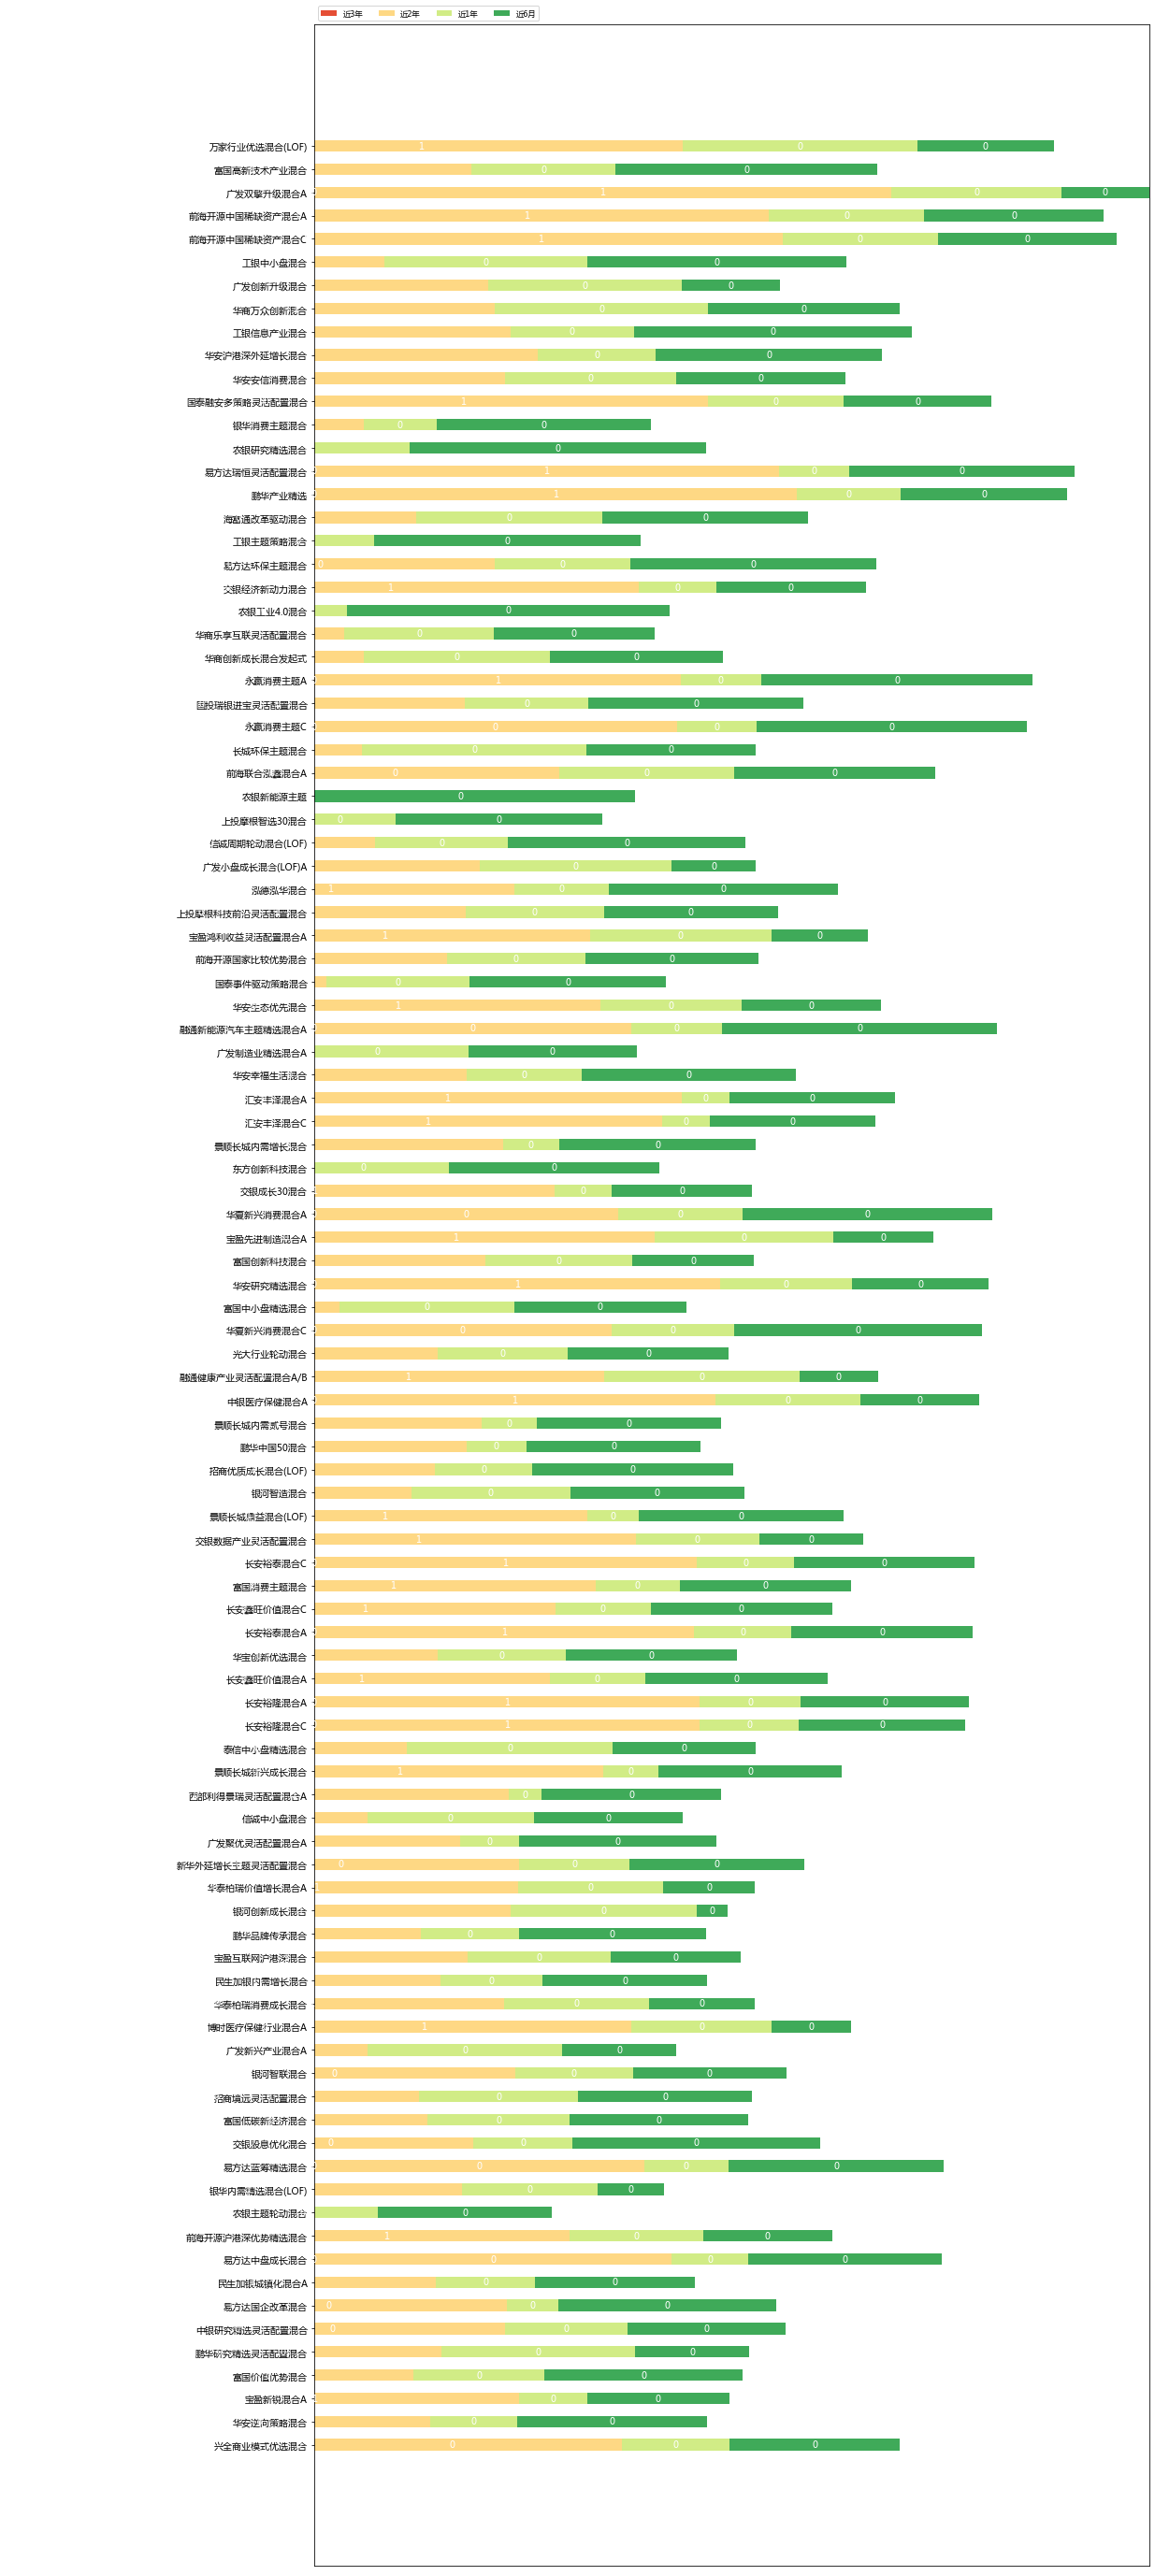

In [654]:
stack_barh(incre_diffs_dict,category_names=temp_diff.columns,figsize=(16,50));

有上图可知：
- 2018年，大部分基金都处于亏损状态，2019年大幅改善，其中大部分近3年累计收益率较高的基金，其收益占比主要来源于2019年的收益
- 从上图基金不同年份的收益占比分布可以看出，大部分基金在不同年份的收益占比存在着此消彼长的规律：
    - 大部分基金从2018年的亏损状态转为2019年的大幅增长；
    - 2019年实现较大幅度增长的基金，其在2020年或者近6个月内的增幅会有明显的放缓和下跌；  
    
**以上说明了股票市场轮动机制显著，大部分时间在进行着产业与产业之间的轮动投资，所以如果进行基金或股票的投资，稳健做法就是分散投资，切忌把所有的鸡蛋放在同一个篮子里**

## 股票部分

### 最新季度二十大基金重仓股票排名

In [655]:
recent_q_df = f_s_df[f_s_df['持仓截止日期'] == f_s_df['持仓截止日期'].max()]
recent_q_sh= recent_q_df.groupby(['股票名称']).agg({'股票名称':'count','持仓占比':'mean'}).rename(columns={'股票名称':'重仓基金数','持仓占比':'基金平均持仓占比'}).reset_index()

将重仓基金数和基金平均持仓占比归一化

创建`持仓评分`指标，计算`重仓基金数`和`基金平均持仓占比`的调和平均数，从而综合评估基金对股票的持仓情况：
$$持仓评分 = 2\times\frac{归一化的重仓机构数*归一化的基金平均持仓占比}{归一化的重仓机构数+归一化的基金平均持仓占比}$$

In [656]:
# 创建以调和平均数为计算方法的持仓评分指标
from sklearn.preprocessing import MinMaxScaler

def create_ss_score(df,feature1,feature2,create_feature_name):
    '''
    df - (DataFrame) The dataset contains data that need to scale.
    feature1 - (str) column1 of df that need to scale
    feature2 - (str) column2 of df that need to scale
    create_feature_name: The column name that rank fund shareholds 
    '''
    scale = MinMaxScaler()
    df[[feature1,feature2]] = scale.fit_transform(df[[feature1,feature2]])
    df[create_feature_name] = 2*(df[feature1]*df[feature2])/(df[feature1]+df[feature2])

In [657]:
recent_q_sh_copy = recent_q_sh.copy()
create_ss_score(recent_q_sh_copy,'重仓基金数','基金平均持仓占比','持仓评分')

In [658]:
recent_q_sh_copy.head()

,股票名称,重仓基金数,基金平均持仓占比,持仓评分
0,TCL科技,0.025641,0.374505,0.047996
1,一心堂,0.000000,0.841480,0.000000
2,一拖股份,0.051282,0.145751,0.075870
3,万华化学,0.076923,0.457067,0.131684
4,万年青,0.000000,0.072655,0.000000


In [659]:
top20_cc_rank = recent_q_sh_copy.sort_values('持仓评分',ascending=False).iloc[:20]

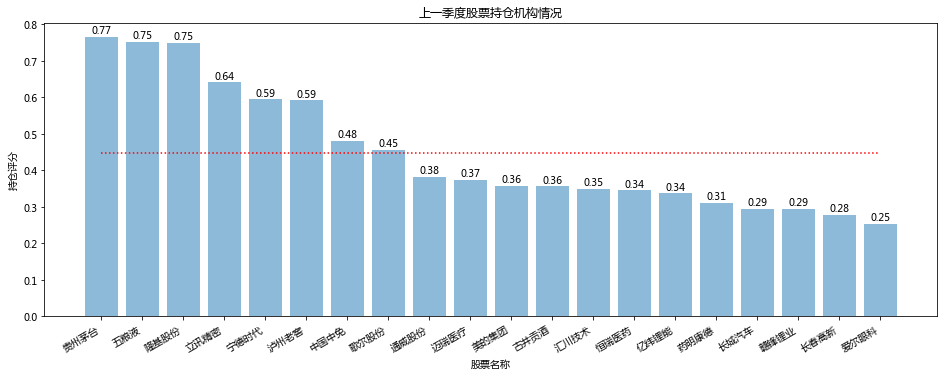

In [660]:
fig,ax = plt.subplots(figsize=(16,6))
x = top20_cc_rank['股票名称']
y1 = top20_cc_rank['持仓评分']
ax.bar(x,y1,alpha=0.5)
ax.set(xlabel='股票名称',
      ylabel='持仓评分',
      title='上一季度股票持仓机构情况')
for a,b in zip(np.arange(len(x)),y1):
    ax.text(a,b+0.009,'%.2f'%b,fontsize=10,horizontalalignment='center')
ax.hlines(y=y1.mean(),xmin=0,xmax=19,colors='r',linestyles='dotted')
fig.autofmt_xdate(rotation=30);

- 上一季度基金对***贵州茅台、五粮液、隆基股份、立讯精密、宁德时代、泸州老窖***较为看好
    - 其中机构对***高端白酒行业***更为青睐，前6大重仓股中有3只股票属于高端白酒行业，如贵州茅台、五粮液和泸州老窖；

- 前20大重仓股中，有5只股票是属于医疗医药行业，如迈瑞医疗、恒瑞医药、药明康德、长春高新和爱尔眼科，但基金对这几只医药股的持仓评分均不高，从上图可以看出医药行业中没有持仓评分高于持仓平均值的股票，说明机构上一季度对于医药的行情相对保守；

- 从这20只股票的行业领域来看，分别为高端白酒、新能源（光伏/锂能/汽车）、医疗医药、以及消费电子，投资者可以重点关注这几个方向的龙头企业（如上），如股票最近涨幅过大，切忌不要追高，等回调至一定幅度再进行投资

### 环比季度持仓变化趋势
环比基金二十大重仓股票在每个季度与上一期对比的持仓变化和趋势

In [661]:
q_sh = f_s_df.groupby(['持仓截止日期','股票名称']).agg({'股票名称':'count','持仓占比':'mean'}).rename(columns={'股票名称':'重仓基金数','持仓占比':'基金平均持仓占比'})
q_sh_copy = q_sh.copy()

In [662]:
create_ss_score(q_sh_copy,'重仓基金数','基金平均持仓占比','持仓评分')

In [663]:
q_sh_copy.head()

重仓基金数  基金平均持仓占比      持仓评分
持仓截止日期     股票名称                              
2020-03-31 一心堂   0.000000  0.478365  0.000000
           万兴科技  0.000000  0.528846  0.000000
           万华化学  0.000000  0.198317  0.000000
           万孚生物  0.000000  0.270433  0.000000
           万科A   0.139535  0.381868  0.204387

In [664]:
# 按照持仓评分进行季度环比，探索每个季度二十大重仓股的变化趋势
g = q_sh_copy['持仓评分'].groupby(level=0,group_keys=False)
res= g.apply(lambda x:x.sort_values(ascending=False).head(20))

In [665]:
recent_q_date = datetime.strftime(f_s_df['持仓截止日期'].max(),'%Y-%m-%d')

In [666]:
sh_trend = res.unstack(level=0).sort_values(recent_q_date,ascending=False)

使用两种方式可视化基金的持仓变化，如下：
- `plotSlope`是一个开源的旨在可视化***BumpChart***的脚本文件，来源于[pascal-schetelat/Github](https://github.com/pascal-schetelat/Slope)
```python
from plotSlope import slope
```
- 使用`Tableau`操作***BumpChart***，可视化结果已分享到Tableau Public平台，点击下方链接即可查看  
[2020年基金前三季度持仓趋势变化](https://public.tableau.com/profile/novel6911#!/vizhome/2020_16062353357780/2020TOP20)  

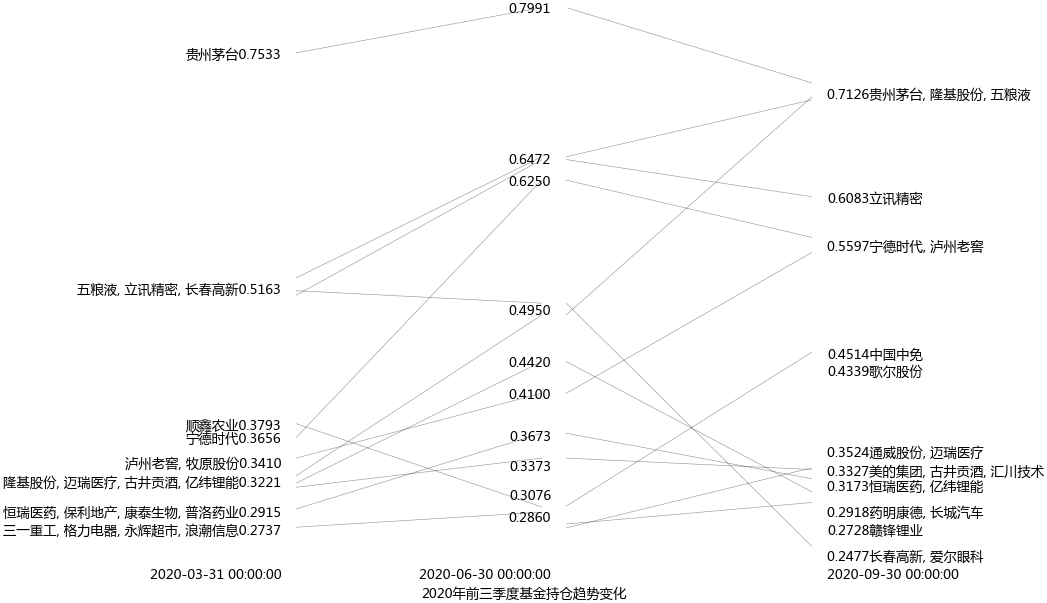

In [667]:
# 下面用plotSlope绘制的bump_chart来体现基金的持仓变化
f = slope(sh_trend,font_family='Microsoft YaHei',marker='%.4f',font_size=32,height=20,width=35,title='2020年前三季度基金持仓趋势变化',dpi=200)

In [670]:
# 下方是使用Tableau绘制BumpChart来体现基金的持仓变化
top20shs_rank = res.reset_index()
file_name = 'top20shs_rank_'+recent_q_date+'.csv'
top20shs_rank.to_csv(file_name,encoding='gbk',index=False)

通过以上两种可视化方式探索分析可得：

- 基金持续稳定看好的个股：
    - ***贵州茅台***
    - ***五粮液***
    - ***泸州老窖***
    - ***立讯精密***
    - ***宁德时代***
- 基金不断增持的个股，说明基金看好其未来发展前景，认为其存在一定的投资价值；：
    - ***隆基股份***
    - ***中国中免***
    - ***美的集团***
- 基金不断减持的个股，说明基金对其目前或者未来前景持有保留意见：
    - ***长春高新***
    - ***康泰生物***
    - ***顺鑫农业***
    - ***保利地产*** 
    - ***普洛药业***  
    
从以上所涉及的行业领域划分来看：
- 基金维持着对高端白酒行业龙头企业的高比重操作，说明基金持续稳定地看好此类企业的长期投资价值；
- 基金不断地增持对新能源，特别是光伏产业的股份，说明该产业目前已显现一定的成长性，基金看好其未来的发展前景；
- 基金不断减持地产、农业和部分医疗企业的股份，说明企业对这些行业或部分医药企业的未来成长性存疑，对于这些行业，投资者需谨慎对待：
    - 基金对医药行业不同赛道的不同企业在持仓态度上存在较大的分化，如基金仍然看好迈瑞医疗、爱尔眼科、恒瑞医药、药明康德这些企业，但对长春高新、康泰生物、普洛药业，却较大减持了它们的股份，所以投资者对于医药行业需要谨慎择股

# 结论与建议

- 基金部分
    - 哪些基金的长期收益较高？哪些基金不管是从长期还是短期来看，其收益都能保持着较为稳定的增长？
    - 长期收益较高的基金（如近3年、近2年累计收益率较高的基金）是否存在近期收益下降的趋势？
    - 基金市场收益是否存在较强的周期性？
- 股票部分
    - 近期基金对于个股的持仓变化，比如青睐哪些个股？
    - 能否从基金持仓数据中展现产业发展趋势？


## 基金部分
1. 整体收益较稳定的基金：工银信息产业混合、富国高新技术产业混合、工银中小盘混合
- 近3年和近2年累计收益率较高的基金，近期收益处于明显放缓或下跌趋势，如：万家行业优选混合(LOF)、国泰融安多策略灵活配置混合、广发双擎升级混合、广发创新升级混合、前海开源中国稀缺资产混合C、前海开源中国稀缺资产混合A。
- 近期涨幅较大的基金前期没有较大幅度的增长，如：：工银主题策略混合、农银研究精选混合、易方达环保主题混合、易方达瑞恒灵活配置混合，说明了基金市场存在明显的周期性。
- 基金对标的是股票市场，而股票市场的投资伴随着产业轮动效应，基金对于不同产业的投资如果偏科严重可能会导致收益波动较大，如追求长期稳定收益的，应该选择其持仓配置更为综合的基金，而对于短期涨幅较大的基金或产业，应该谨慎投资，因为此时这部分产业可能存在风险大于机会。

**基金投资建议：**切勿追高近期涨幅较大的基金标的，选择整体收益较为稳定的基金或者股票配置在产业领域更为综合的基金，分散投资，切忌把所有的鸡蛋放在同一个篮子里

## 股票部分
- 上一季度基金机构持仓较多的股票有：**贵州茅台、五粮液、隆基股份、立讯精密、宁德时代、泸州老窖**；
- 纵观2020年前三季度的持仓数据，基金维持着对**高端白酒行业**的高持仓操作，说明大部分基金机构看好该产业的长期投资价值，所以此产业的龙头企业可以重点关注；
- 基金不断地**增持**对**新能源，如光伏产业、新能源汽车和锂能**，说明该产业目前已显现一定的成长性，基金看好其未来的发展前景；
- 基金不断**减持地产、农业和部分医药产业**，说明企业对这些行业未来成长性存疑，对于这些行业，投资者需谨慎对待；
- 基金对医药行业不同赛道的不同企业在持仓态度上存在较大的分化，如基金仍然看好迈瑞医疗、爱尔眼科、恒瑞医药、药明康德这些企业，但对长春高新、康泰生物、普洛药业，却较大减持了它们的股份，所以投资者对于医药行业需要谨慎择股；
- 股票市场存在较强的**周期性和板块轮动性**，如需投资股票市场的，对于近期涨幅较大的股票，切忌追高；

**股票投资建议**：重点关注高端白酒产业的龙头企业，关注新能源产业，特别是光伏、新能源汽车和锂能的龙头企业的企业信息和行业动态，如国家对于该类产业的政策扶持等，医药医疗行业分化较大，谨慎择股。最后，切忌追高。